# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


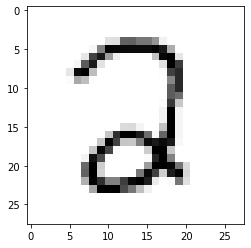

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.21580982384329458
train accuracy is: 0.8294942413620431, test accuracy is 0.8210685483870968


Epoch 10 Loss 0.0531278230791063
train accuracy is: 0.9458354197963612, test accuracy is 0.953125


Epoch 20 Loss 0.03890969019930544
train accuracy is: 0.9584376564847271, test accuracy is 0.9621975806451613


Epoch 30 Loss 0.03313273726779931
train accuracy is: 0.9644466700050075, test accuracy is 0.9647177419354839


Epoch 40 Loss 0.029774564132454537
train accuracy is: 0.9677015523284928, test accuracy is 0.9682459677419355


Epoch 50 Loss 0.0275159534601196
train accuracy is: 0.9701218494408279, test accuracy is 0.969758064516129


Epoch 60 Loss 0.025836560491456537
train accuracy is: 0.971373727257553, test accuracy is 0.9707661290322581


Epoch 70 Loss 0.02449628406631844
train accuracy is: 0.9735436488065431, test accuracy is 0.9702620967741935


Epoch 80 Loss 0.023380209391795834
train accuracy is: 0.9747955266232682, test accuracy is 0.9712701612903226


Epoch 90 Loss 0.022431061570742313
train accuracy is: 0.9758804873977633, test accuracy is 0.9717741935483871


Epoch 100 Loss 0.02159740663235838
train accuracy is: 0.9764646970455684, test accuracy is 0.9737903225806451


Epoch 110 Loss 0.0208395750909606
train accuracy is: 0.9771323652144884, test accuracy is 0.9747983870967742


Epoch 120 Loss 0.020165759574656807
train accuracy is: 0.9774661992989484, test accuracy is 0.9747983870967742


Epoch 130 Loss 0.019523286028681714
train accuracy is: 0.9785511600734434, test accuracy is 0.9747983870967742


Epoch 140 Loss 0.01890129857998827
train accuracy is: 0.9794692038057086, test accuracy is 0.9747983870967742


Epoch 150 Loss 0.01831835117507269
train accuracy is: 0.9802203304957436, test accuracy is 0.9747983870967742


Epoch 160 Loss 0.01777968342621326
train accuracy is: 0.9807210816224337, test accuracy is 0.9753024193548387


Epoch 170 Loss 0.01728242657959626
train accuracy is: 0.9815556668335838, test accuracy is 0.9753024193548387


Epoch 180 Loss 0.016796063296272323
train accuracy is: 0.9820564179602738, test accuracy is 0.9753024193548387


Epoch 190 Loss 0.016336422817290967
train accuracy is: 0.9825571690869638, test accuracy is 0.9758064516129032


Epoch 200 Loss 0.015893587571027303
train accuracy is: 0.9831413787347688, test accuracy is 0.9768145161290323


Epoch 210 Loss 0.015470617077559574
train accuracy is: 0.9836421298614588, test accuracy is 0.9768145161290323


Epoch 220 Loss 0.015041898192641338
train accuracy is: 0.9843097980303789, test accuracy is 0.9773185483870968


Epoch 230 Loss 0.014649643920038086
train accuracy is: 0.984727090635954, test accuracy is 0.9773185483870968


Epoch 240 Loss 0.014264113728954659
train accuracy is: 0.985311300283759, test accuracy is 0.9773185483870968


0.005428480071828441

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2203408998229039
train accuracy is: 0.785845434818895, test accuracy is 0.7878024193548387


Epoch 10 Loss 0.09922706211931771
train accuracy is: 0.914204640293774, test accuracy is 0.9279233870967742


Epoch 20 Loss 0.07785067965630853
train accuracy is: 0.9296444667000501, test accuracy is 0.9435483870967742


Epoch 30 Loss 0.06758386458539911
train accuracy is: 0.9375730262059756, test accuracy is 0.9490927419354839


Epoch 40 Loss 0.06127309091109991
train accuracy is: 0.9424136204306459, test accuracy is 0.9526209677419355


Epoch 50 Loss 0.05691561347960515
train accuracy is: 0.9450008345852111, test accuracy is 0.9546370967741935


Epoch 60 Loss 0.053686144695124935
train accuracy is: 0.9477549657820064, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.051175923388635226
train accuracy is: 0.9495910532465365, test accuracy is 0.9576612903225806


Epoch 80 Loss 0.04915585503178704
train accuracy is: 0.9510098481054916, test accuracy is 0.9591733870967742


Epoch 90 Loss 0.047486969264860415
train accuracy is: 0.9521782674011017, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.046077864220689525
train accuracy is: 0.9530128526122517, test accuracy is 0.9606854838709677


Epoch 110 Loss 0.04486670769129943
train accuracy is: 0.9532632281755967, test accuracy is 0.9627016129032258


Epoch 120 Loss 0.04381446571808709
train accuracy is: 0.9535970622600568, test accuracy is 0.9637096774193549


Epoch 130 Loss 0.04288631541515767
train accuracy is: 0.9548489400767819, test accuracy is 0.9642137096774194


Epoch 140 Loss 0.04206067993331965
train accuracy is: 0.9557669838090469, test accuracy is 0.9637096774193549


Epoch 150 Loss 0.04131889450176391
train accuracy is: 0.956685027541312, test accuracy is 0.9642137096774194


Epoch 160 Loss 0.040648554866462384
train accuracy is: 0.957018861625772, test accuracy is 0.9647177419354839


Epoch 170 Loss 0.040039004224978865
train accuracy is: 0.957269237189117, test accuracy is 0.9647177419354839


Epoch 180 Loss 0.03948077424118751
train accuracy is: 0.957603071273577, test accuracy is 0.9652217741935484


Epoch 190 Loss 0.038966582383525954
train accuracy is: 0.9581872809213821, test accuracy is 0.9657258064516129


Epoch 200 Loss 0.03849147727606377
train accuracy is: 0.9590218661325322, test accuracy is 0.9662298387096774


Epoch 210 Loss 0.03805052425088866
train accuracy is: 0.9594391587381071, test accuracy is 0.9662298387096774


Epoch 220 Loss 0.03764029365318249
train accuracy is: 0.9601068269070272, test accuracy is 0.9667338709677419


Epoch 230 Loss 0.037255743607218894
train accuracy is: 0.9600233683859122, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.036895687785519674
train accuracy is: 0.9601902854281422, test accuracy is 0.9667338709677419


0.055064036802339796

### Comparing results of NN and LR

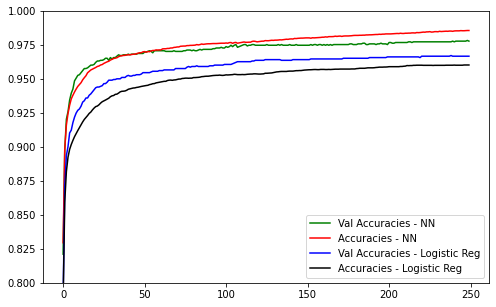

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

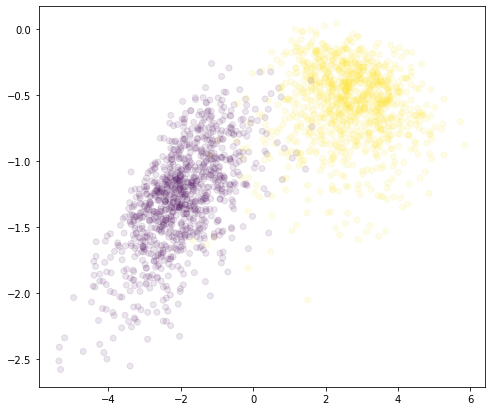

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

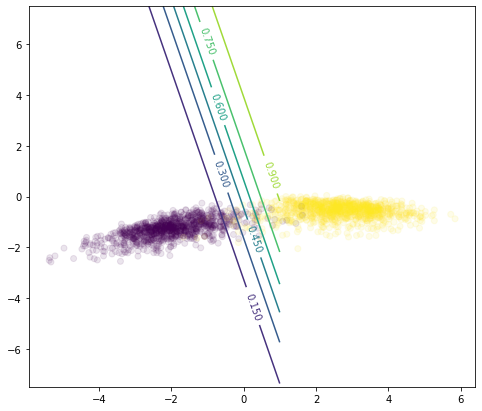

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );